<a href="https://colab.research.google.com/github/MuhammedAshraf2020/Paper2Code/blob/main/03%20-%20ResNet/resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

 97% 337M/346M [00:03<00:00, 141MB/s]
100% 346M/346M [00:03<00:00, 98.8MB/s]


In [ ]:
!unzip /content/intel-image-classification.zip

In [ ]:
path = "/content/seg_train/seg_train"

In [ ]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch , os
import matplotlib.pyplot as plt

In [ ]:
names = ['buildings', 'forest',  'glacier',  'mountain' , 'sea',  'street' ]

In [ ]:
transform = transforms.Compose([transforms.ToTensor() , transforms.Resize((400 , 400)) ])

In [ ]:
dataset = torchvision.datasets.ImageFolder(path , transform = transform)

In [ ]:
dataloader = DataLoader(dataset , batch_size = 16 , shuffle = True)

In [ ]:
sample = next(iter(dataloader))

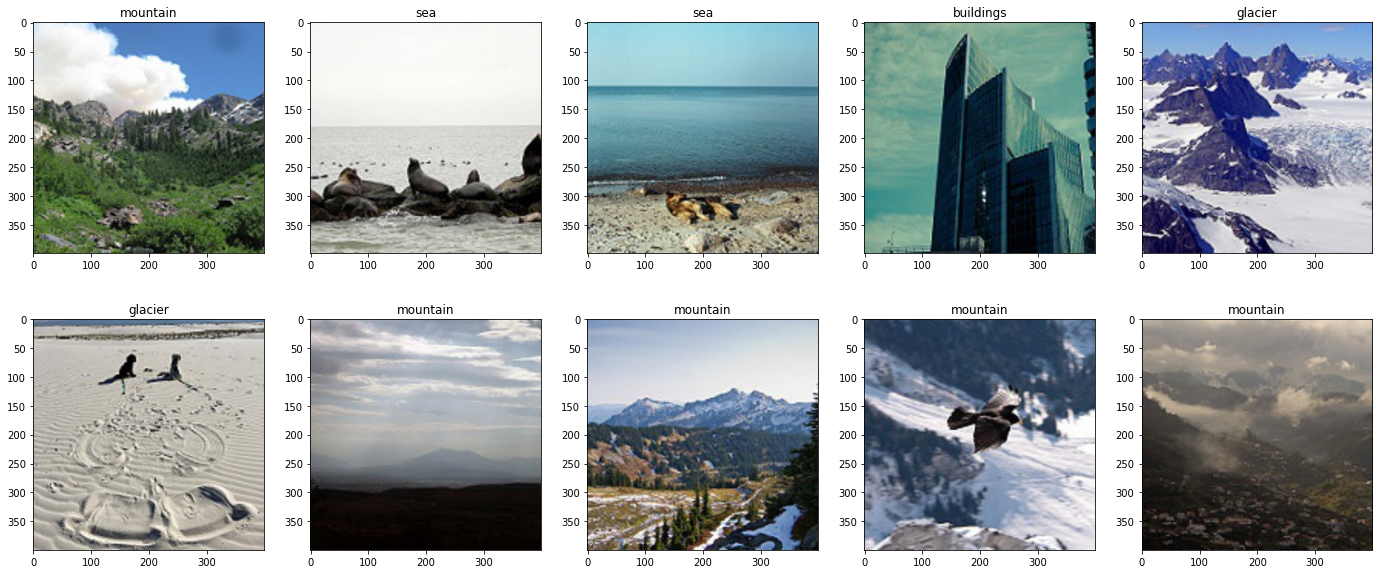

In [ ]:
sub = plt.figure(figsize = (24 , 10))
rows = 2
cols = 5
for index in range (1 , rows * cols + 1):
  # extract img , label
  img = sample[0][index]
  lbl = sample[1][index]
  sub.add_subplot(rows , cols , index)
  plt.imshow(img.detach().permute(1 , 2 , 0))
  plt.title(names[lbl.item()])
plt.show()

In [ ]:
!pip install pytorch-lightning

     |████████████████████████████████| 527 kB 5.3 MB/s 
     |████████████████████████████████| 397 kB 41.7 MB/s 
     |████████████████████████████████| 952 kB 29.0 MB/s 
     |████████████████████████████████| 829 kB 40.5 MB/s 
     |████████████████████████████████| 596 kB 42.7 MB/s 
     |████████████████████████████████| 133 kB 44.7 MB/s 
     |████████████████████████████████| 1.1 MB 28.8 MB/s 
     |████████████████████████████████| 94 kB 206 kB/s 
     |████████████████████████████████| 144 kB 45.8 MB/s 
     |████████████████████████████████| 271 kB 48.8 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=a3991f1efec19c6aa91068ea83ab681dfad09ffa5c39c2c70a647cfd701dff1d
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successful

In [ ]:
!unzip resnet.zip

Archive:  resnet.zip
   creating: resnet/
  inflating: resnet/train.py         
   creating: resnet/configs/
   creating: resnet/configs/training/
  inflating: resnet/configs/training/default.yaml  
   creating: resnet/configs/model/
 extracting: resnet/configs/model/default.yaml  
   creating: resnet/configs/dataset/
  inflating: resnet/configs/dataset/default.yaml  
  inflating: resnet/configs/config.yaml  
  inflating: resnet/dataloader.py    
  inflating: resnet/model.py         
  inflating: resnet/requirements.txt  


In [ ]:
!pip install hydra-core

     |████████████████████████████████| 145 kB 5.3 MB/s 
     |████████████████████████████████| 112 kB 51.0 MB/s 
     |████████████████████████████████| 74 kB 3.3 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=84cfa173d5b35f394b7baf5842ffd7a312f0028dd01a04ba154ee66f5c98e49f
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
Successfully built antlr4-python3-runtime


In [ ]:
pip install wandb

     |████████████████████████████████| 1.7 MB 5.3 MB/s 
     |████████████████████████████████| 144 kB 37.3 MB/s 
     |████████████████████████████████| 180 kB 43.8 MB/s 
     |████████████████████████████████| 63 kB 210 kB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=398bd2b90a9b115432feb790dd233f5f3152559c65188ff02cca0066caf0c513
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
!wandb login --relogin

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
!mv resnet/* /content

In [ ]:
!python train.py

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | stem    | Sequential | 19.5 K
1 | learner | Sequential | 23.5 M
2 | task    | Sequential | 12.3 K
---------------------------------------
23.6 M    Trainable params
0         Non-trainable params
23.6 M    Total params
94.227    Total estimated model params size (MB)
Validation sanity check: 0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/data_loading.py:662: UserWarning: Your `val_dataloader` has `shuffle=True`, it is strongly recommended that you turn this off for val/test/predict dataloaders.
  category=UserWarning,
Epoch 0:   2% 20/1218 [00:37<37:08,  1.86s/it, loss=1.73]wandb: Currently logged in as: muhammed266 (use `wandb login --relogin` to force relogin)
wandb: Tracking run with wandb version 0.12.10
wandb: Syncing r